In [14]:
# Code on ICA using kurtosis criterion
# We test two types of random variables (gaussian, laplace) 
#     and two different algorithms (gradient descent & fixed-point)

import numpy as np
import matplotlib.pyplot as plt

def znorm(x):
    x -= x.mean()
    x /= x.std()
    x = x.reshape(1,-1)
    return x

N = 5000
g = np.random.randn(N)
#x1 = znorm(np.random.rand(N))
#x2 = znorm(np.random.rand(N))
x1 = znorm(np.random.laplace(size=N)**3)
x2 = znorm(np.random.laplace(size=N)**3)
x1 = znorm(np.random.laplace(size=N))
x2 = znorm(np.random.laplace(size=N))

x = np.concatenate((x1,x2), axis=0)

A = np.random.randn(2,2)
(Q, R) = np.linalg.qr(A)
x.shape
#plt.hist(g,40, density=True);
#plt.hist(x1,40, density=True);

(2, 5000)

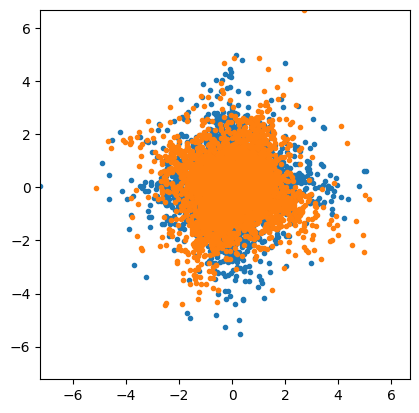

In [15]:
z = Q@x
plt.plot(x[0,:], x[1,:], '.')
plt.plot(z[0,:], z[1,:], '.')

mn = min(z.min(), x.min())
mx = max(z.max(), x.max())
plt.xlim((mn,mx))
plt.ylim((mn,mx))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

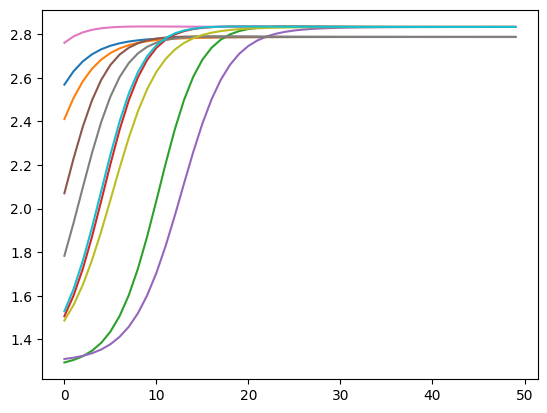

In [16]:
def gradient_descent(z):
    w0 = np.random.randn(2,1)
    w = w0
    w /= np.linalg.norm(w)
    
    gamma = 0.1
    kurts = []
    
    for iter in range(50):
        y = w.T@z
        kurt = (y**4).mean()-3*(np.mean(y**2))**2
        kurts.append(kurt)
        Dw = np.sign(kurt)*np.mean(z*(y**3), axis=1).reshape(-1,1)
        w += gamma*Dw
        w /= np.linalg.norm(w)
    
    plt.plot(kurts)
    return w

for t in range(10):
    w = gradient_descent(z)
sest = w.T@z
sest = sest.reshape(-1,)
z1 = z[0,:]
#plt.hist(sest);

In [17]:
def fixed_point(z):
    w0 = np.random.randn(2,1)
    w = w0
    w /= np.linalg.norm(w)
    
    ws = []
    kurts = []
    ws.append(w)
    for iter in range(10):
        y = w.T@z
        kurt = (y**4).mean()-3*(np.mean(y**2))**2
        kurts.append(kurt)
        w = np.mean(z*(y**3), axis=1).reshape(-1,1)-3*w
        w /= np.linalg.norm(w)
        ws.append(w)
        
    plt.plot(kurts)
    #ws = np.array(ws).squeeze()
    #print(ws.shape)
    #plt.plot(ws[:,0], ws[:,1], 'o')
    
    return w
    

[[0.39974782 0.91662516]]
[[0.39974782 0.91662516]]
[[ 0.93263561 -0.36081965]]
[[0.39974782 0.91662516]]
[[ 0.93263561 -0.36081965]]


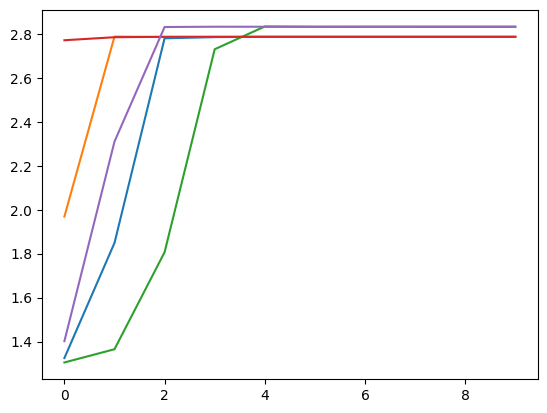

In [18]:
for t in range(5):
    w = fixed_point(z).T
    print(w)

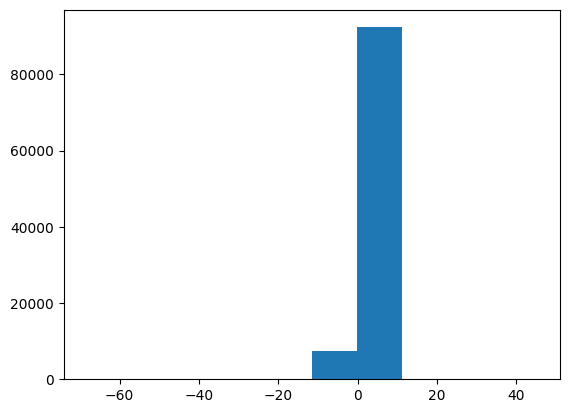

In [348]:
sest = w@z
sest = sest.reshape(-1,)
z1 = z[0,:]
plt.hist(sest);

In [350]:
print(kurtosis(z[0,:].reshape(-1,)))
print(kurtosis(z[1,:].reshape(-1,)))
print(kurtosis(sest))
print(kurtosis(x1.reshape(-1,)))


211.99683761522516
266.70578916252106
604.5097840459154
604.5155519788533
